Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and
then,
▪ Measure accuracy of your model using different kernels such as rbf and linear.
▪ Tune your model further using regularization and gamma parameters and try to come up with
highest accurancy score
▪ Use 80% of samples as training data size

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
digits = datasets.load_digits()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=20)

In [4]:
accuracies_linear = []
accuracies_rbf = []

In [5]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracies_linear.append(accuracy_linear)

In [6]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracies_rbf.append(accuracy_rbf)

In [7]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [8]:
best_params = grid_search.best_params_

In [9]:
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, y_train)
y_pred_best = best_svm.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

In [10]:
print("Accuracy with linear kernel:", accuracy_linear)
print("Accuracy with rbf kernel:", accuracy_rbf)
print("Best hyperparameters:", best_params)
print("Accuracy with tuned model:", best_accuracy)

Accuracy with linear kernel: 0.975
Accuracy with rbf kernel: 0.9833333333333333
Best hyperparameters: {'C': 1, 'gamma': 0.001}
Accuracy with tuned model: 0.9888888888888889


Another Method

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [12]:
digits = datasets.load_digits()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [14]:
C_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-3, 1, 5)
C, gamma = np.meshgrid(C_range, gamma_range)

In [15]:
accuracies = np.zeros_like(C)

In [16]:
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        svm = SVC(kernel='rbf', C=C[i, j], gamma=gamma[i, j])
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracies[i, j] = accuracy_score(y_test, y_pred)

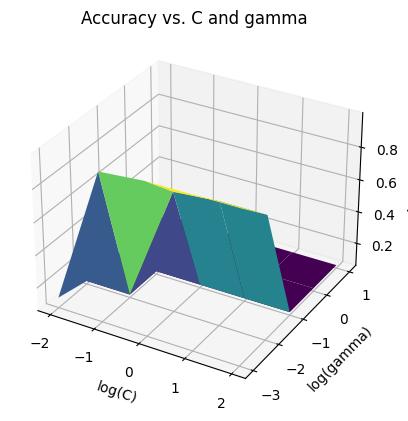

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(C), np.log10(gamma), accuracies, cmap='viridis')
ax.set_xlabel('log(C)')
ax.set_ylabel('log(gamma)')
ax.set_zlabel('Accuracy')
plt.title('Accuracy vs. C and gamma')
plt.show()